In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df= pd.read_csv('data/india.csv')

In [3]:
df.head()

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
0,1,1,KL-TS-P1,30-Jan-20,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
1,2,2,KL-AL-P1,02-Feb-20,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
2,3,3,KL-KS-P1,03-Feb-20,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
3,4,4,DL-P1,02-Mar-20,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,5,TS-P1,02-Mar-20,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03-02-2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN


In [4]:
df.shape

(544, 19)

In [5]:
# check missing values
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
11,Current status,1
13,Notes,3
6,Detected city,144
8,Detected district,157
10,Nationality,186
4,Age,278
18,Contacts,391
2,Government id,414
14,Current location,529


In [6]:
df.describe()

,ID,Unique id,Age
count,544.000000,544.000000,266.000000
mean,272.500000,272.500000,40.500000
std,157.183545,157.183545,17.957865
min,1.000000,1.000000,-1.000000
25%,136.750000,136.750000,25.000000
50%,272.500000,272.500000,38.000000
75%,408.250000,408.250000,55.000000
max,544.000000,544.000000,96.000000


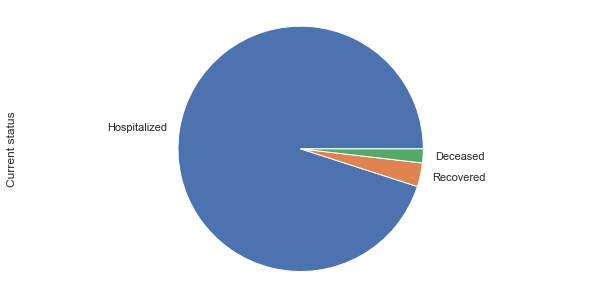

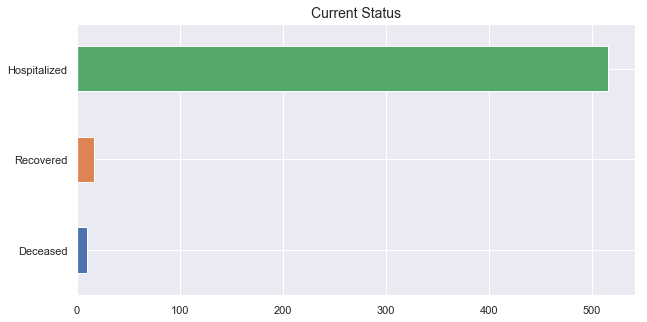

In [7]:
col = 'Current status'

# charts of current status


# pie plot for current status
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for current status
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Current Status', fontsize=14)

plt.show()

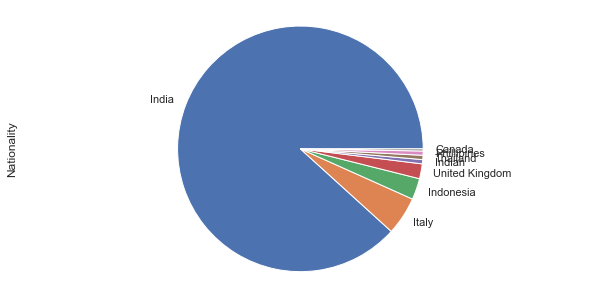

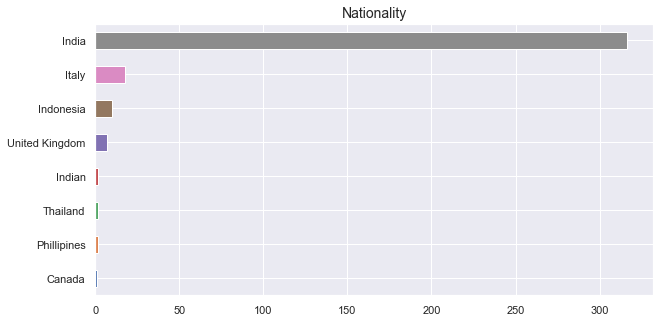

In [8]:
col = 'Nationality'

# charts of nationality

# pie plot for nationality
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for nationality
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Nationality', fontsize=14)
plt.show()

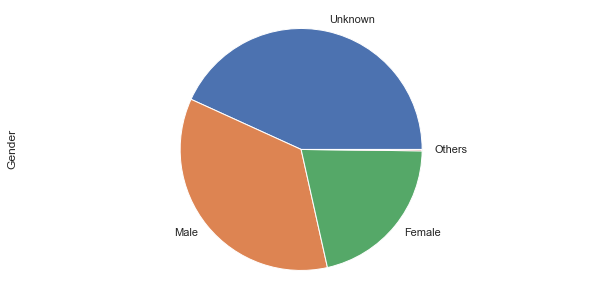

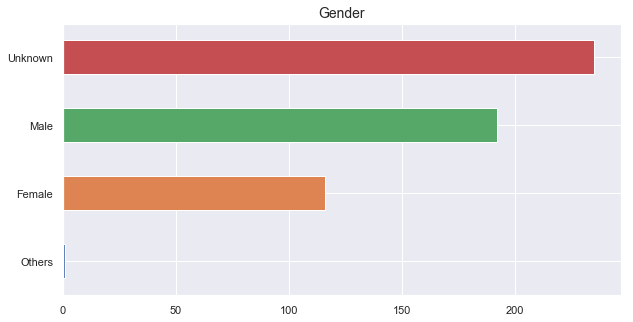

In [9]:
col = 'Gender'

# charts of gender

# pie plot for gender
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for gender
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Gender', fontsize=14)
plt.show()

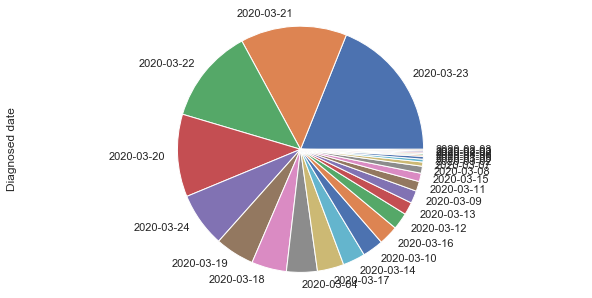

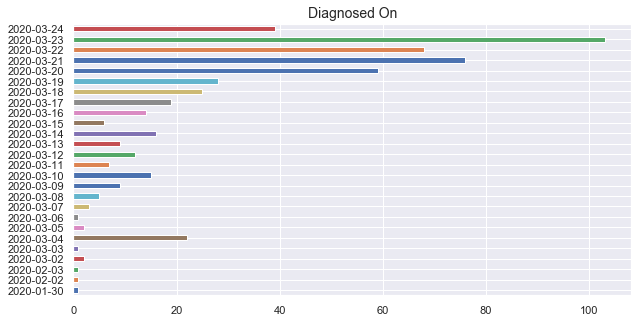

In [10]:
df["Diagnosed date"] = pd.to_datetime(df["Diagnosed date"]).dt.strftime('%Y-%m-%d')

col = 'Diagnosed date'

# charts of diagnosed date

# pie plot for diagnosed date
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for diagnosed date
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts().sort_index().plot(kind='barh', figsize=(10,5))
plt.title('Diagnosed On', fontsize=14)
plt.show()

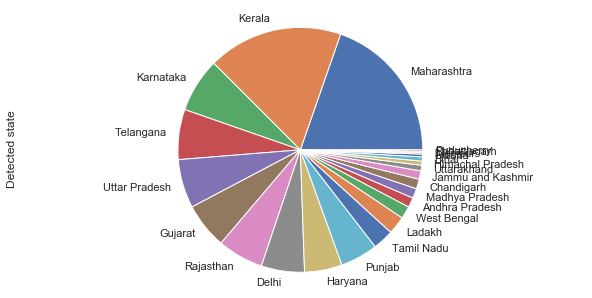

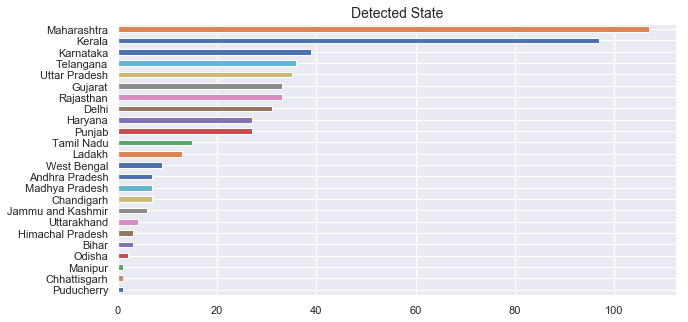

In [11]:
col = 'Detected state'

# charts of detected state

# pie plot for detected state
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for detected state
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Detected State', fontsize=14)
plt.show()

In [12]:
# state-wise data prep
tmp = pd.concat([pd.DataFrame(df['Diagnosed date'].value_counts().sort_index()),
           pd.DataFrame(df[df['Detected state'] == 'Kerala']['Diagnosed date'].value_counts().sort_index()),
           pd.DataFrame(df[df['Detected state'] == 'Maharashtra']['Diagnosed date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['Detected state'] == 'Karnataka']['Diagnosed date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['Detected state'] == 'Telangana']['Diagnosed date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['Detected state'] == 'Uttar Pradesh']['Diagnosed date'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Kerala','Maharashtra','Karnataka','Telangana','Uttar Pradesh']

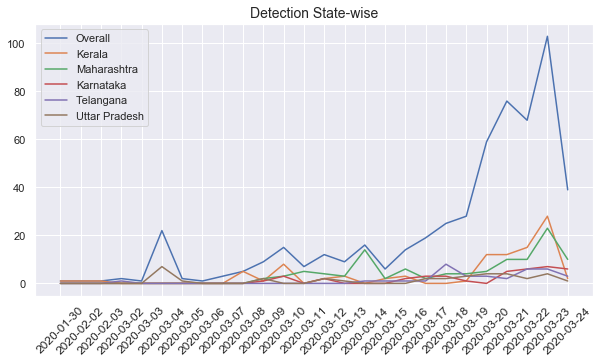

In [13]:
# Detection State-wise
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Detection State-wise', fontsize=14)
plt.show()

In [14]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Maharashtra_CumSum'] = tmp['Maharashtra'].cumsum()
tmp_cumsum['Kerala_CumSum'] = tmp['Kerala'].cumsum()
tmp_cumsum['Karnataka_CumSum'] = tmp['Karnataka'].cumsum()
tmp_cumsum['Telangana_CumSum'] = tmp['Telangana'].cumsum()
tmp_cumsum['Uttar Pradesh_CumSum'] = tmp['Uttar Pradesh'].cumsum()
tmp_cumsum

,Overall_CumSum,Maharashtra_CumSum,Kerala_CumSum,Karnataka_CumSum,Telangana_CumSum,Uttar Pradesh_CumSum
2020-01-30,1,0,1,0,0,0
2020-02-02,2,0,2,0,0,0
2020-02-03,3,0,3,0,0,0
2020-03-02,5,0,3,0,1,0
2020-03-03,6,0,3,0,1,0
2020-03-04,28,0,3,0,1,7
2020-03-05,30,0,3,0,1,8
2020-03-06,31,0,3,0,1,8
2020-03-07,34,0,3,0,1,8
2020-03-08,39,0,8,0,1,8


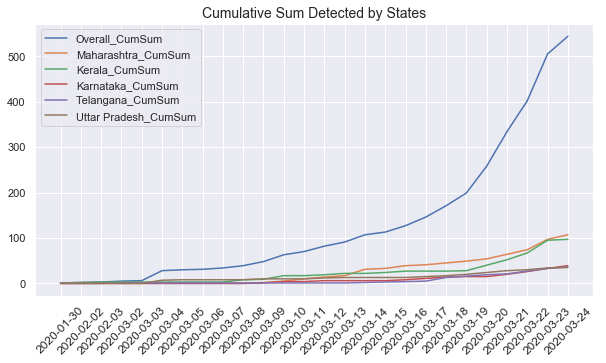

In [15]:
# Cumulative Sum Detected by States
tmp_cumsum.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Detected by States', fontsize=14)
plt.show()

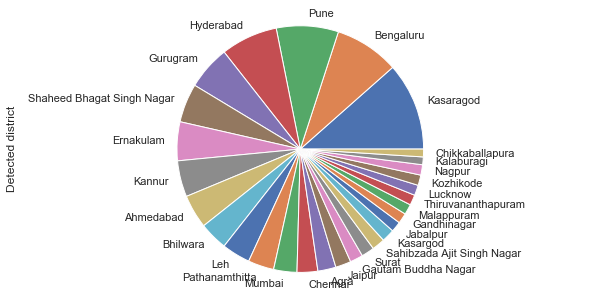

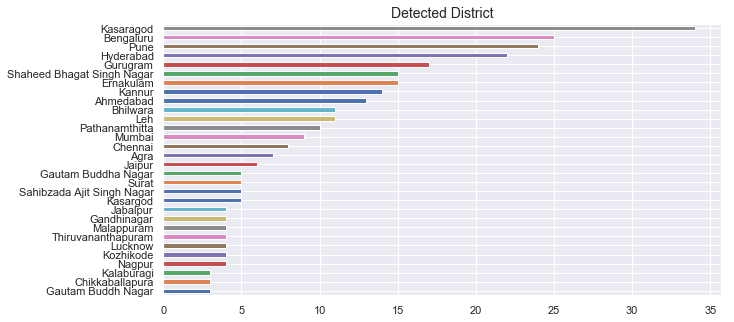

In [16]:
col = 'Detected district'

# charts of detected district

# pie plot for detected district
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for detected district
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected District', fontsize=14)
plt.show()

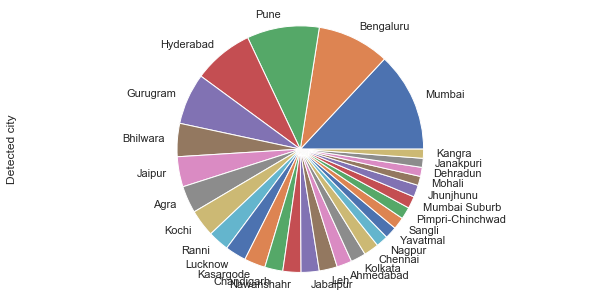

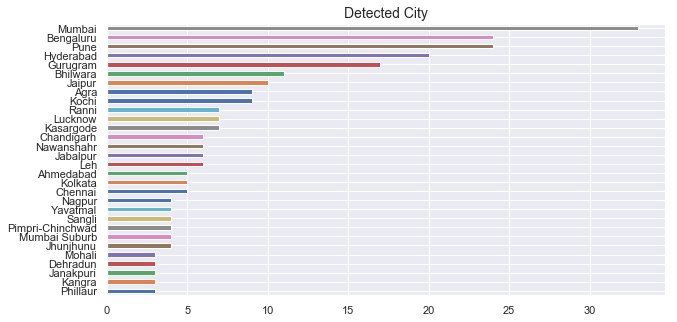

In [17]:
col = 'Detected city'

# charts of detected city

# pie plot for detected city
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

# bar plot for detected city
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected City', fontsize=14)
plt.show()

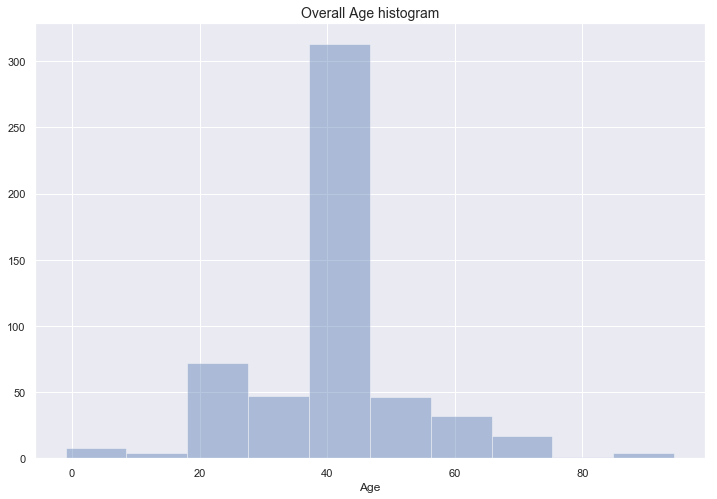

In [18]:
# treat age outliers
col = 'Age'
fmean = df[col].mean()
fstd = df[col].std()
df.ix[np.abs(df[col]-fmean) > (3*fstd), col] = fmean + (3*fstd)  # treat upper outliers
df.ix[np.abs(df[col]-fmean) < -(3*fstd), col] = -(fmean + (3*fstd)) # treat lower outliers

# missing age filled with median
df[col].fillna(df[col].median(), inplace=True) 

col = 'Age'
# age histogram
plt.figure(figsize=(12,8))
sns.distplot(df[col].values, bins=10, kde=False)
plt.xlabel(col, fontsize=12)
plt.title('Overall Age histogram', fontsize=14)
plt.show()

In [19]:
df['Current status'].value_counts()

Hospitalized    516
Recovered        17
Deceased         10
Name: Current status, dtype: int64

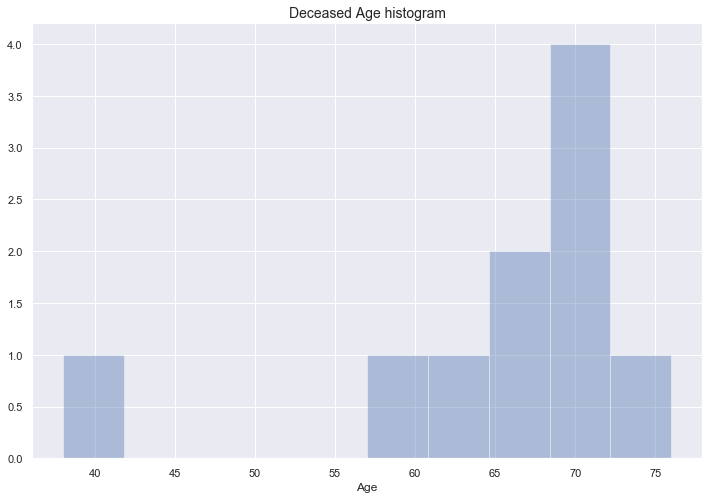

In [20]:
col1 = 'Current status'
col2 = 'Age'
tmp = df[df[col1] == 'Deceased']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=10, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Deceased Age histogram', fontsize=14)
plt.show()

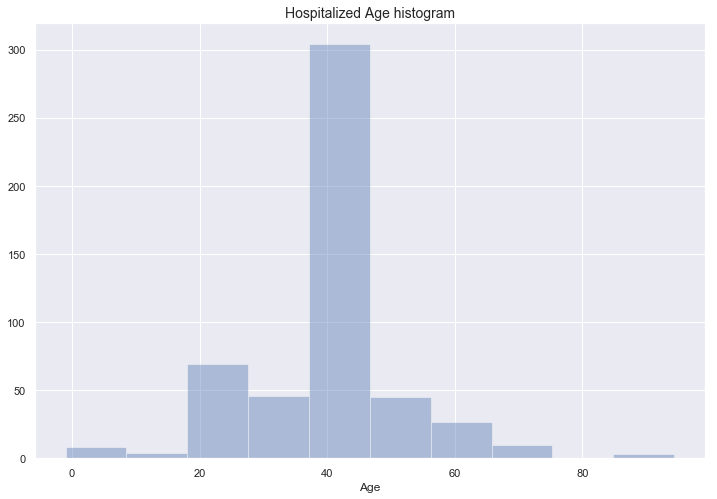

In [21]:
col1 = 'Current status'
col2 = 'Age'
tmp = df[df[col1] == 'Hospitalized']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=10, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Hospitalized Age histogram', fontsize=14)
plt.show()

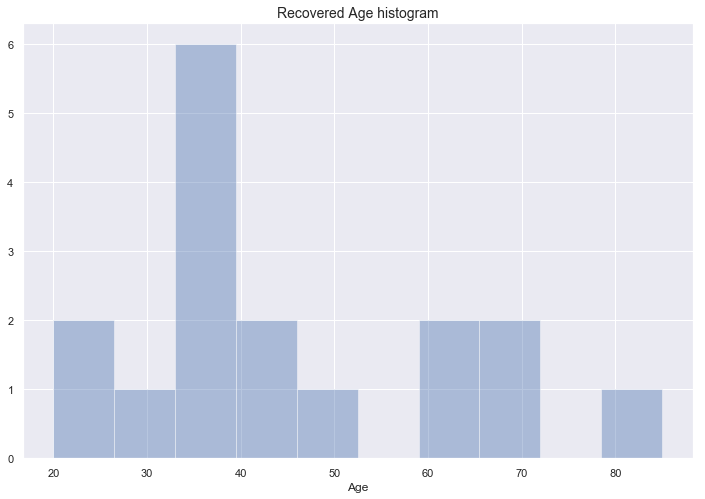

In [22]:
col1 = 'Current status'
col2 = 'Age'
tmp = df[df[col1] == 'Recovered']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=10, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Recovered Age histogram', fontsize=14)
plt.show()